In [1]:
import pandas as pd
coffee = pd.read_csv('starbucks_customers.csv')
print(coffee.columns)
coffee.info()

Index(['spent', 'nearest_starbucks', 'age', 'rate_quality', 'rate_price',
       'rate_promo', 'ambiance', 'wifi', 'service', 'meetings_hangout'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   spent              122 non-null    int64
 1   nearest_starbucks  122 non-null    int64
 2   age                122 non-null    int64
 3   rate_quality       122 non-null    int64
 4   rate_price         122 non-null    int64
 5   rate_promo         122 non-null    int64
 6   ambiance           122 non-null    int64
 7   wifi               122 non-null    int64
 8   service            122 non-null    int64
 9   meetings_hangout   122 non-null    int64
dtypes: int64(10)
memory usage: 9.7 KB


## Centering Your Data
Data centering involves subtracting the mean of a data set from each data point so that the new mean is 0. This process helps us understand how far above or below each of our data points is from the mean.

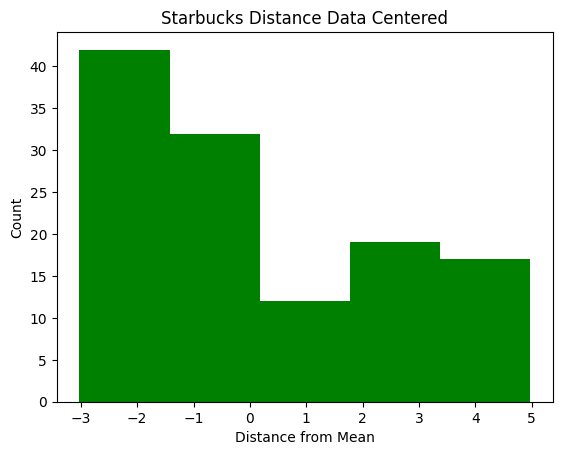

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

distance = coffee['nearest_starbucks']
#get the mean of your feature
mean_dis = np.mean(distance)

#take our distance array and subtract the mean_dis, this will create a new series with the results
centered_dis = distance - mean_dis

#visualize your new list
plt.hist(centered_dis, bins = 5, color = 'g')

#label our visual
plt.title('Starbucks Distance Data Centered')
plt.xlabel('Distance from Mean')
plt.ylabel('Count')
plt.show();

The min age is 13
The max age is 70
The difference betwwn min and max ages is 57
The mean ages is 27.33606557377049
0      24.663934
1       7.663934
2       1.663934
3       0.663934
4       0.663934
         ...    
117    -5.336066
118    -5.336066
119    -7.336066
120    -7.336066
121   -13.336066
Name: age, Length: 122, dtype: float64


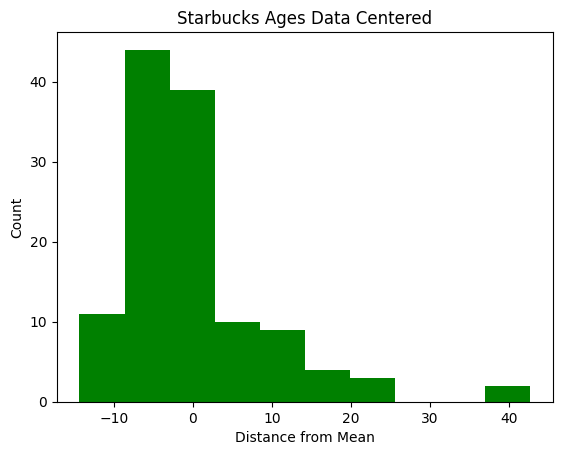

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

coffee = pd.read_csv('starbucks_customers.csv')
ages = coffee['age']
min_age = np.min(ages)
print(f'The min age is {min_age}')
max_age = np.max(ages)
print(f'The max age is {max_age}')
print(f'The difference betwwn min and max ages is {max_age-min_age}')
mean_age = np.mean(ages)
print(f'The mean ages is {mean_age}')
centered_ages = ages - mean_age
print(centered_ages)

#visualize your new list
plt.hist(centered_ages, color = 'g')

#label our visual
plt.title('Starbucks Ages Data Centered')
plt.xlabel('Distance from Mean')
plt.ylabel('Count')
plt.show();

## Standardizing our Data
Excellent work with centering the age feature from our dataset! Now we’ll take that concept one step further and discuss standardizing our data. Standardization (also known as Z-Score normalization) is when we center our data, then divide it by the standard deviation. Once we do that, our entire data set will have a mean of zero and a standard deviation of one. This allows all of our features to be on the same scale. How cool is that?

This step is critical because some machine learning models will treat all features equally regardless of their scale. You’ll definitely want to standardize your data in the following situations:

* Before Principal Component Analysis
* Before using any clustering or distance based algorithm (think KMeans or DBSCAN)
* Before KNN
* Before performing regularization methods like LASSO and Ridge

In [4]:
distance = coffee['nearest_starbucks']

#find the mean of our feature
distance_mean = np.mean(distance)

#find the standard deviation of our feature
distance_std_dev = np.std(distance)
    
#this will take each data point in distance subtract the mean, then divide by the standard deviation
distance_standardized = (distance - distance_mean) / distance_std_dev

# print what type distance_standardized is
print(type(distance_standardized))
#output = <class 'pandas.core.series.Series'>

#print the mean
print(np.mean(distance_standardized))
#output = 7.644158530205996e-17

#print the standard deviation
print(np.std(distance_standardized))

<class 'pandas.core.series.Series'>
-9.464196275493137e-17
0.9999999999999997


In [5]:
import pandas as pd
import numpy as np

coffee = pd.read_csv('starbucks_customers.csv')
ages = coffee['age']

## add code below
## set up your variables
mean_age = np.mean(ages)
std_dev_age = np.std(ages)

## standardize ages
ages_standardized = (ages - mean_age) / std_dev_age

## print the results 
print(f'The new mean is {np.mean(ages_standardized)}')
print(f'The new std is {np.std(ages_standardized)}')

The new mean is 1.7290358580227847e-16
The new std is 0.9999999999999999


### Standardizing our Data with Sklearn
Now that we understand the mathematics behind a standard scaler let’s quickly implement it with the sklearn library. We will begin by importing our StandardScaler library from sklearn.preprocessing.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

We instantiate the StandardScaler by setting it to a variable called scaler which we can then use to transform our feature. The next step is to reshape our distance array. StandardScaler must take in our array as 1 column, so we’ll reshape our distance array using the .reshape(-1,1) method. This numpy method says to take our data and give it back to us as 1 column, represented in the second value. The -1 asks numpy to figure out the exact number of rows to create based on our data. Pretty cool, right?

reshaped_distance = np.array(distance).reshape(-1,1)
distance_scaler = scaler.fit_transform(reshaped_distance)

Just like we learned in the last lesson, we do this so our data has a mean of 0 and standard deviation of 1. Let’s print to see how the StandardScaler did.

print(np.mean(distance_scaler))
#output = -9.464196275493137e-17
print(np.std(distance_scaler))
#output = 0.9999999999999997

You’ll notice the e-17 at the end of our output for the mean, and that is our number written in exponential notation. Written in standard notation our answer is -0.00000000000000009464196275493137. Which basically has the mean at 0 and our standard deviation = 1. Great work! Now you can try to standardize the age column with the new knowledge you just gained.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
distance = coffee['nearest_starbucks']
reshaped_distance = np.array(distance).reshape(-1,1)
distance_scaler = scaler.fit_transform(reshaped_distance)

print(np.mean(distance_scaler))
#output = -9.464196275493137e-17
print(np.std(distance_scaler))
#output = 0.9999999999999997

-9.464196275493137e-17
0.9999999999999997


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 

coffee = pd.read_csv('starbucks_customers.csv')
ages = coffee['age']

scaler = StandardScaler()
ages_reshaped= np.array(ages).reshape(-1,1)
ages_scaled = scaler.fit_transform(ages_reshaped)

print(np.mean(ages_scaled))

print(np.std(ages_scaled))


1.7290358580227847e-16
0.9999999999999999


In [8]:
np.array(distance)

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6,
       6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Min-Max Normalization
Another form of scaling your data is to use a min-max normalization process. The name says it all, we find the minimum and maximum data point in our entire data set and set each of those to 0 and 1, respectively. Then the rest of the data points will transform to a number between 0 and 1, depending on its distance between the minimum and maximum number. We find that transformed number by taking the data point subtracting it from the minimum point, then dividing by the value of our maximum minus minimum.

Mathematically a min-max normalization looks like this:

 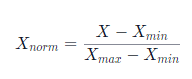
​
 
One thing to note about min-max normalization is that this transformation does not work well with data that has extreme outliers. You will want to perform a min-max normalization if the range between your min and max point is not too drastic.

The reason we would want to normalize our data is very similar to why we would want to standardize our data - getting everything on the same scale.

We’d do this process to our entire data set, but lets look at our distance to a nearest Starbucks feature. We already know from earlier in this lesson that our range in this feature is not too large, so it is a good candidate for a min-max normalization. We’ll write a function that will perform the mathematics needed to transform the entire column.

distance = coffee['nearest_starbucks']

#find the min value in our feature
distance_min = np.min(distance)

#find the max value in our feature
distance_max = np.max(distance)

#normalize our feature by following the formula
distance_normalized = (distance - distance_min) / (distance_max - distance_min)

Excellent! Now if I were to print all the unique numbers in distance_norm here is what we will see.

{0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0}

We can see that all numbers are between 0 and 1. Amazing!

In [10]:
distance = coffee['nearest_starbucks']

#find the min value in our feature
distance_min = np.min(distance)

#find the max value in our feature
distance_max = np.max(distance)

#normalize our feature by following the formula
distance_normalized = (distance - distance_min) / (distance_max - distance_min)

np.unique(distance_normalized)

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])

### Min-Max Normalization with Sklearn
Happy to see you now have a strong understanding of how a Min-Max Normalization works, let’s try implementing it with the sklearn library.

We will start by importing our MinMaxScaler library from sklearn.preprocessing. Just like we covered in the StandardScaler exercise, we start by instantiating the MinMaxScaler by setting it to a variable called mmscaler which we can then use to transform our feature.

from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

The next step is to import our distance feature and reshape it so it is ready for our mmscaler.

#get our distance feature
distance = coffee['nearest_starbucks']

#reshape our array to prepare it for the mmscaler
reshaped_distance = np.array(distance).reshape(-1,1)

#.fit_transform our reshaped data
distance_norm = mmscaler.fit_transform(reshaped_distance)

#see unique values
print(set(np.unique(distance_norm)))
#output = {0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0}

Excellent. We now have a normalized feature within our dataset using the sklearn library MinMaxScaler!

In [11]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

#get our distance feature
distance = coffee['nearest_starbucks']

#reshape our array to prepare it for the mmscaler
reshaped_distance = np.array(distance).reshape(-1,1)

#.fit_transform our reshaped data
distance_norm = mmscaler.fit_transform(reshaped_distance)

#see unique values
print(set(np.unique(distance_norm)))
#output = {0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0}

{0.0, 0.125, 0.5, 0.25, 0.375, 0.625, 0.75, 0.875, 1.0}


## Binning our Data
Binning data is the process of taking numerical or categorical data and breaking it up into groups. We could decide to bin our data to help capture patterns in noisy data. There isn’t a clean and fast rule about how to bin your data, but like so many things in machine learning, you need to be aware of the trade-offs.

You want to make sure that your bin ranges aren’t so small that your model is still seeing it as noisy data. Then you also want to make sure that the bin ranges are not so large that your model is unable to pick up on any pattern. It is a delicate decision to make and will depend on the data you are working with.

Going back to our customer data and looking at our distance feature, let’s look at the data with a histogram.

image

We can easily see that a lot of customers who completed this survey live fairly close to a Starbucks, and our data has a range of 0 km to 8km. I wonder how our data would transform if we were to bin our data in the following way:

distance < 1km
1.1km <= distance < 3km
3.1km <= distance < 5km
5.1km <= distance
First, we’ll set the upper boundaries of what we listed above.

bins = [0, 1, 3, 5, 8.1]

Now you may be asking yourself ‘Why end at 8.1? Isn’t our max value 8?’ That is true! We have 8.1 and not 8 because the pandas function we will use pd.cut() has a parameter where it will include the lower bound, and excludes the upper bound. Let me show you what I mean.

coffee['binned_distance'] = pd.cut(coffee['nearest_starbucks'], bins, right = False)

print(coffee[['binned_distance', 'nearest_starbucks']].head(3))


We can see that those who marked 8 km now live in the [5.0, 8.1) bucket. The bracket [ tells us 5.0 is included, and the parenthesis ) tells us that 8.1 is excluded. We could write it as an inequality statement like this: 5 <= distance < 8.1 this allows our customers who marked 8 to belong to the ‘Lives greater than 5.1 km’ bin. Now let’s have a look at our newly binned data.


Use this new skill to bin our age feature.

  binned_distance  nearest_starbucks
0      [5.0, 8.1)                  8
1      [5.0, 8.1)                  8
2      [5.0, 8.1)                  8


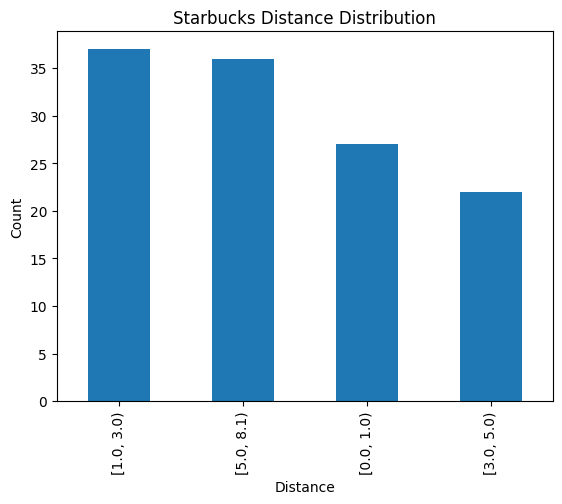

In [13]:
bins = [0, 1, 3, 5, 8.1]
coffee['binned_distance'] = pd.cut(coffee['nearest_starbucks'], bins, right = False)

print(coffee[['binned_distance', 'nearest_starbucks']].head(3))

#output
#  binned_distance  nearest_starbucks
#0      [5.0, 8.1)                  8
#1      [5.0, 8.1)                  8
#2      [5.0, 8.1)                  8
# Plot the bar graph of binned distances
coffee['binned_distance'].value_counts().plot(kind='bar')
 
# Label the bar graph 
plt.title('Starbucks Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Count') 
 
# Show the bar graph 
plt.show()

Max age is 70
Min age is 13
0    [40, 71)
1    [30, 40)
2    [20, 30)
3    [20, 30)
4    [20, 30)
5    [20, 30)
6    [20, 30)
7    [20, 30)
8    [20, 30)
9    [20, 30)
Name: binned_ages, dtype: category
Categories (4, interval[int64, left]): [[12, 20) < [20, 30) < [30, 40) < [40, 71)]


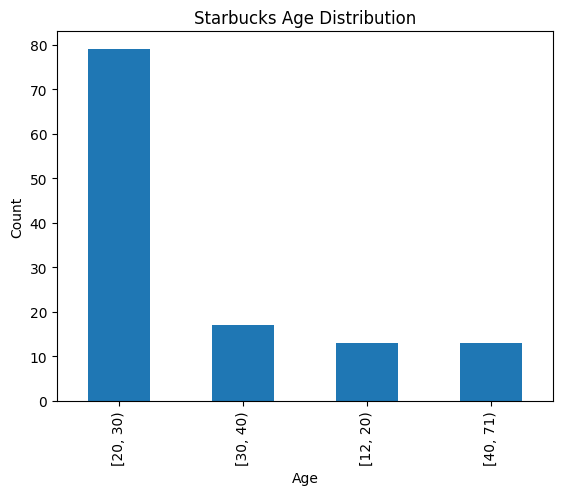

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

coffee = pd.read_csv('starbucks_customers.csv')
ages = coffee['age']

print(f'Max age is {np.max(ages)}')
print(f'Min age is {np.min(ages)}')

age_bins = [12, 20, 30, 40, 71]

coffee['binned_ages'] = pd.cut(coffee['age'], age_bins, right = False)

print(coffee['binned_ages'][:10])

coffee['binned_ages'].value_counts().plot(kind='bar')
 
# Label the bar graph 
plt.title('Starbucks Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count') 
 
# Show the bar graph 
plt.show()

## Natural Log Transformation
We’ve covered plenty of transformations! We have one last transformation we need to cover, and that is log transformations. Logarithms are an essential tool in statistical analysis and machine learning preparation. This transformation works well for right-skewed data and data with large outliers. After we log transform our data, one large benefit is that it will allow the data to be closer to a “normal” distribution. It also changes the scale so our data points will drastically reduce the range of their values.

For example, let’s explore a whole new data set from Kaggle around used car prices. Take a look at this histogram plot of 100,000 used car odometers.

import pandas as pd

#import our dataframe
cars = pd.read_csv('cars.csv')

#set our variable
odometer = cars['odometer']

#graph our odometer readings
plt.hist(odometer, bins = 200, color = 'g')

#add labels
plt.xticks(rotation = 45)
plt.title('Number of Cars by Odometer Reading')
plt.ylabel('Number of Cars')
plt.xlabel('Odometer')
plt.show();

image

This histogram is right-skewed, where the majority of our data is located on the left side of our graph. If we were to provide this feature to our machine learning model it will see a lot of different cars with odometer readings off on the left of our graph. It will not see a lot of examples with very high odometer readings. This may cause issues with our model, as it may struggle to pick up on patterns that are within those examples off on the right side of our histogram.

We’ll perform a log transformation using numpy to see how our data will transform.

import numpy as np

#perform the log transformation
log_car = np.log(cars['odometer'])

#graph our transformation
plt.hist(log_car, bins = 200, color = 'g')

#rotate the x labels so we can read it easily
plt.xticks(rotation = 45)

#provide a title
plt.title('Logarithm of Car Odometers')
plt.show();

image

Our data looks much closer to a normal distribution! If we were to look at a sample of five different cars with varying odometer readings, let’s examine how the log transformation changed their values.

make	odometer	odometer_logged
Altima	10126	9.222862
Jetta	34042	10.435350
Camry	56762	10.946622
Civic	100103	11.513955
F-150	145695	11.889271
Saturn	151687	11.929574
If we compare the Altima with 10,126 miles to the Saturn with 151,687 miles those two cars have a huge difference in odometer readings. Yet, once we log transform the data we see the range from 9.22 to 11.93 is much smaller. Compressing the range of our data can help our model perform better!

There is so much more to add about log transformation. For the purpose of this exercise we just want to give a high overview and demonstrate how to log transform your data. Before we have you start testing your new skills let’s quickly cover two major topics with log transformation:

1. Using a log transformation in a machine learning model will require some extra interpretation. For example, if you were to log transform your data in a linear regression model, our independent variable has a multiplication relationship with our dependent variable instead of the usual additive relationship we would have if our data was not log-transformed.
2. Keep in mind, just because your data is skewed does not mean that a log transformation is the best answer. You would not want to log transform your feature if:
- You have values less than 0. The natural logarithm (which is what we’ve been talking about) of a negative number is undefined.
- You have left-skewed data. That data may call for a square or cube transformation.
- You have non-parametric data

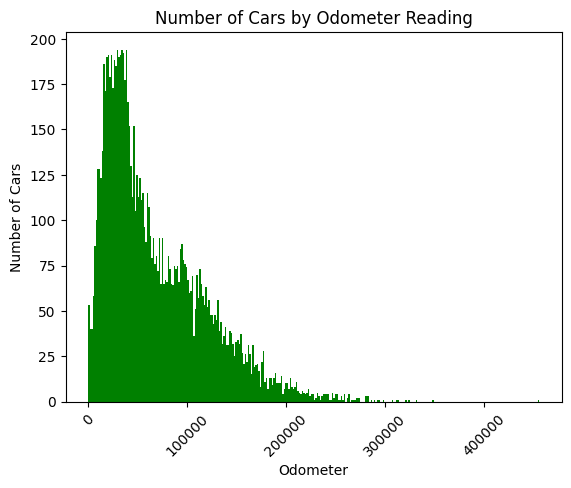

In [21]:
import pandas as pd

#import our dataframe
cars = pd.read_csv('cars.csv')

#set our variable
odometer = cars['odometer']

#graph our odometer readings
plt.hist(odometer, bins = 300, color = 'g')

#add labels
plt.xticks(rotation = 45)
plt.title('Number of Cars by Odometer Reading')
plt.ylabel('Number of Cars')
plt.xlabel('Odometer')
plt.show();

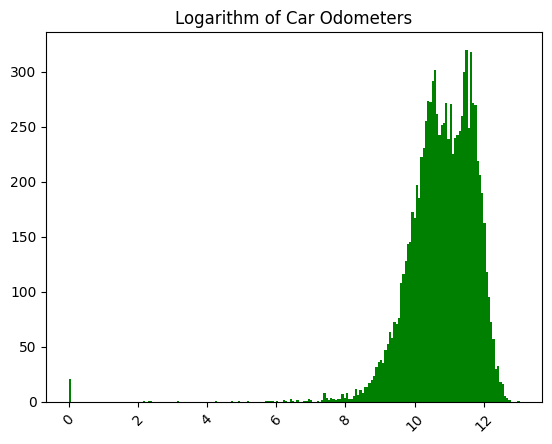

In [22]:
import numpy as np

#perform the log transformation
log_car = np.log(cars['odometer'])

#graph our transformation
plt.hist(log_car, bins = 200, color = 'g')

#rotate the x labels so we can read it easily
plt.xticks(rotation = 45)

#provide a title
plt.title('Logarithm of Car Odometers')
plt.show();


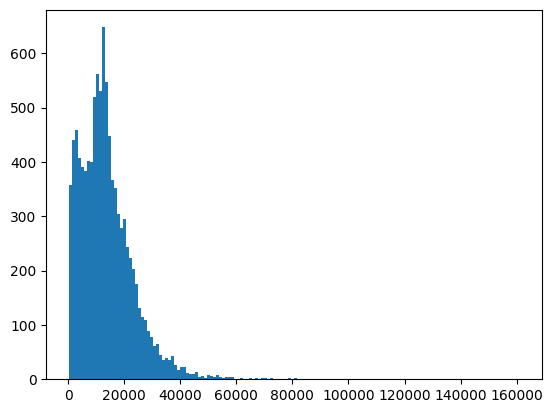

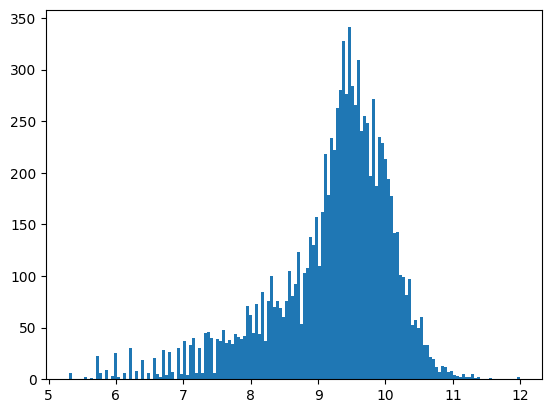

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


## add code below
## read in csv file
cars = pd.read_csv('cars.csv')

## set you price variable
prices = cars['sellingprice']

plt.hist(prices, bins = 150)
#plt.xticks(rotation = 45)
#plt.title('Selling Price')
plt.show();

log_prices = np.log(prices)

plt.hist(log_prices, bins = 150)
#plt.xticks(rotation = 45)
#plt.title('Selling Price')
plt.show();